In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
imdb_source = pd.read_csv('files/IMDb Movies India.csv')

In [3]:
display(imdb_source.shape)
display(imdb_source.info())
display(imdb_source.describe())

(15509, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


None

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


Cleaning data set

In [32]:
def format_year(year_str):
    if(type(year_str) == str):
        input = year_str.replace('(','').replace(')','')
        return float(input)
    return year_str

In [30]:
def format_duration(dur_str):
    if(type(dur_str) == str):
        dur = dur_str.replace(' min','')
        return float(dur)
    return dur_str

In [33]:
imdb_source['Year']=imdb_source['Year'].apply(format_year)
imdb_source['Duration']=imdb_source['Duration'].apply(format_duration)

In [6]:
year_na = imdb_source['Rating'].notna()
rating_na = imdb_source['Year'].notna()
year_rating = imdb_source[year_na & rating_na]
year_rating.sample(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
4545,Eklavya: The Royal Guard,2007.0,105 min,"Action, Drama, Mystery",6.1,"3,191",Vidhu Vinod Chopra,Amitabh Bachchan,Saif Ali Khan,Sanjay Dutt
5498,Haqeeqat,1995.0,166 min,"Action, Drama, Romance",4.6,321,Kuku Kohli,Ajay Devgn,Tabu,Aruna Irani
3302,Dabangg 2,2012.0,120 min,"Action, Comedy, Crime",4.8,"16,920",Arbaaz Khan,Salman Khan,Sonakshi Sinha,Prakash Raj
2677,Care of Footpath,2009.0,110 min,"Drama, Family",7.2,42,Kishan Shrikanth,Kishan Shrikanth,Jayashree Basavaraj,Jackie Shroff
6571,Jawab,1995.0,NaN,"Action, Drama, Romance",4.1,45,Ajay Kashyap,Raaj Kumar,Karisma Kapoor,Harish
12043,Rungoli,1962.0,136 min,"Musical, Drama, Family",6.5,13,Amar Kumar,Kishore Kumar,Vyjayanthimala,Jeevan
10040,Nauker,1979.0,126 min,"Comedy, Drama",6.4,151,Ismail Memon,Jyoti Swaroop,Sanjeev Kumar,Jaya Bachchan
5721,Hindi Medium,2017.0,132 min,"Comedy, Drama",7.9,"24,676",Saket Chaudhary,Irrfan Khan,Saba Qamar,Dishita Sehgal
13231,Sindhustan,2019.0,64 min,"Documentary, Family, History",9.3,36,Sapna Bhavnani,Leila Advani,Laj Badlani,Chaho Bhara
8507,Madhosh,1994.0,NaN,Romance,6.8,65,Vikram Bhatt,Deven Bhojani,Dilip Dhawan,Dinesh Hingoo


In [7]:
year_rating_summary = year_rating.groupby(by='Year').agg([np.min,np.max,np.mean,'count'])
year_rating_summary.sample(10)

Rating                     
         amin amax      mean count
Year                              
1934.0    2.7  8.5  6.040000     5
2010.0    2.4  8.2  5.426250   160
1943.0    3.1  8.5  6.080000    20
1998.0    1.7  8.6  5.211111   108
1937.0    3.4  7.0  6.125000     8
1953.0    4.6  8.4  6.820690    29
1972.0    2.8  8.7  6.219101    89
1984.0    3.2  8.6  5.970940   117
2006.0    2.6  8.3  5.309701   134
1942.0    5.6  7.6  6.512500     8

<AxesSubplot:xlabel='Year'>

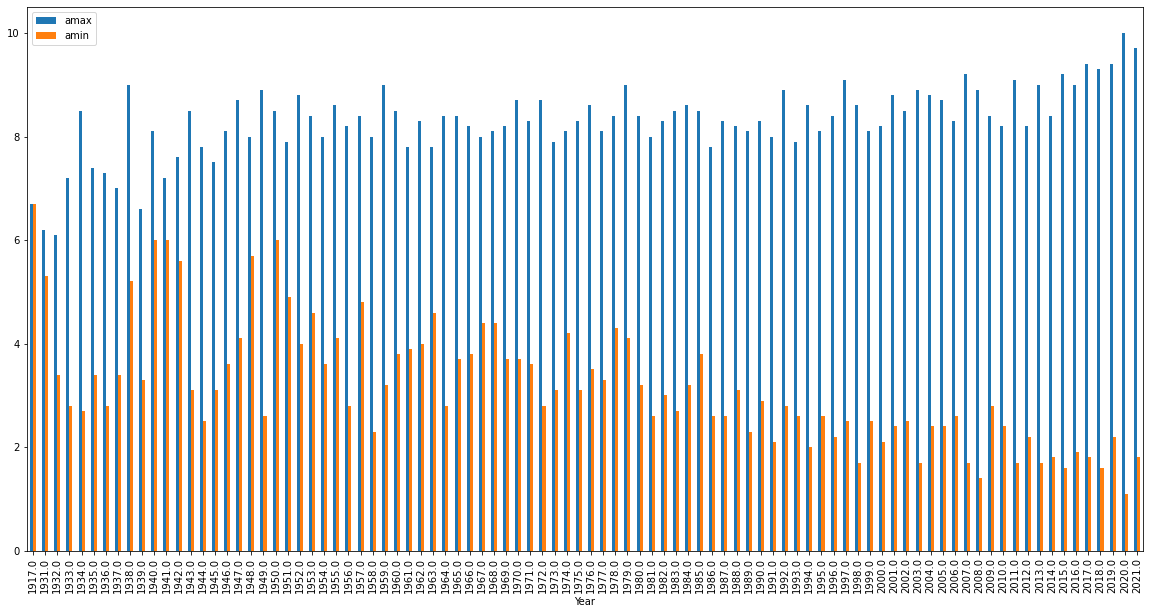

In [27]:
year_rating_summary['Rating'][['amax','amin']].plot.bar(figsize=(20,10))

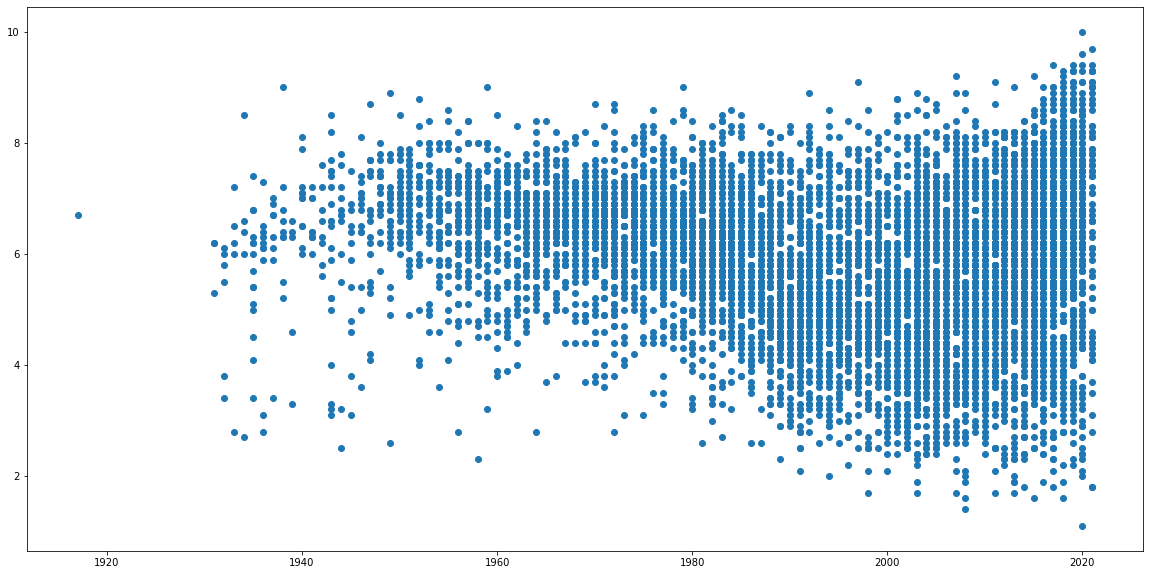

In [9]:
plt.figure(figsize=(20,10))
plt.scatter(year_rating['Year'],year_rating['Rating'])

Number of movies over the years

<AxesSubplot:xlabel='Year'>

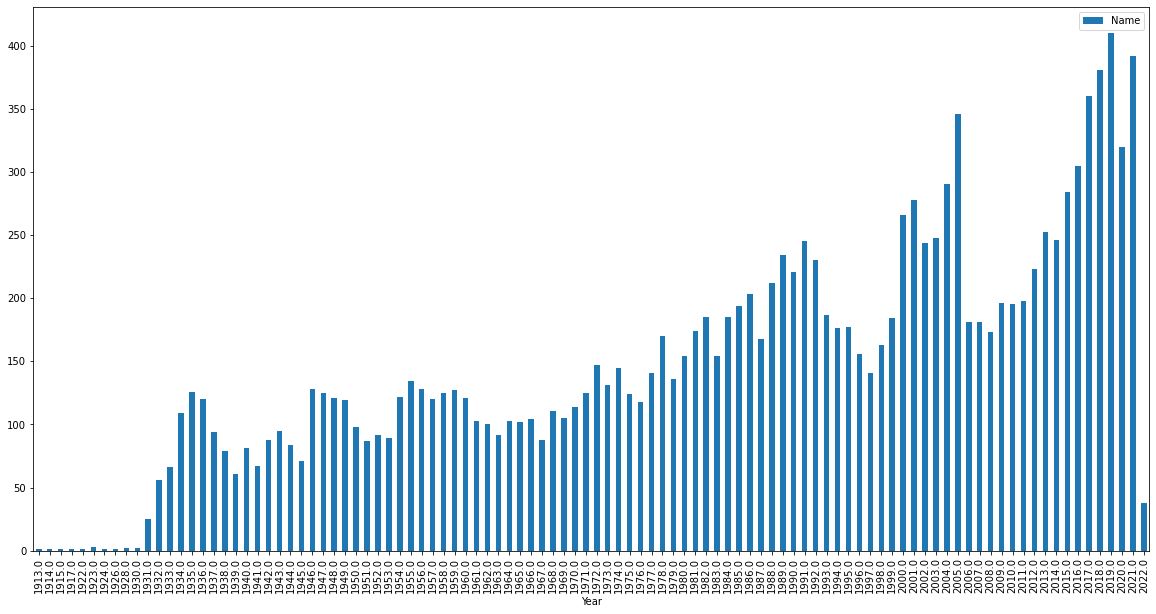

In [22]:
year_movies = imdb_source[imdb_source['Year'].notna()][['Year','Name']]
year_movies_count = no_movies.groupby('Year').count()
year_movies_count.plot.bar(figsize=(20,10))

Duration vs Rating

<AxesSubplot:xlabel='Duration', ylabel='Rating'>

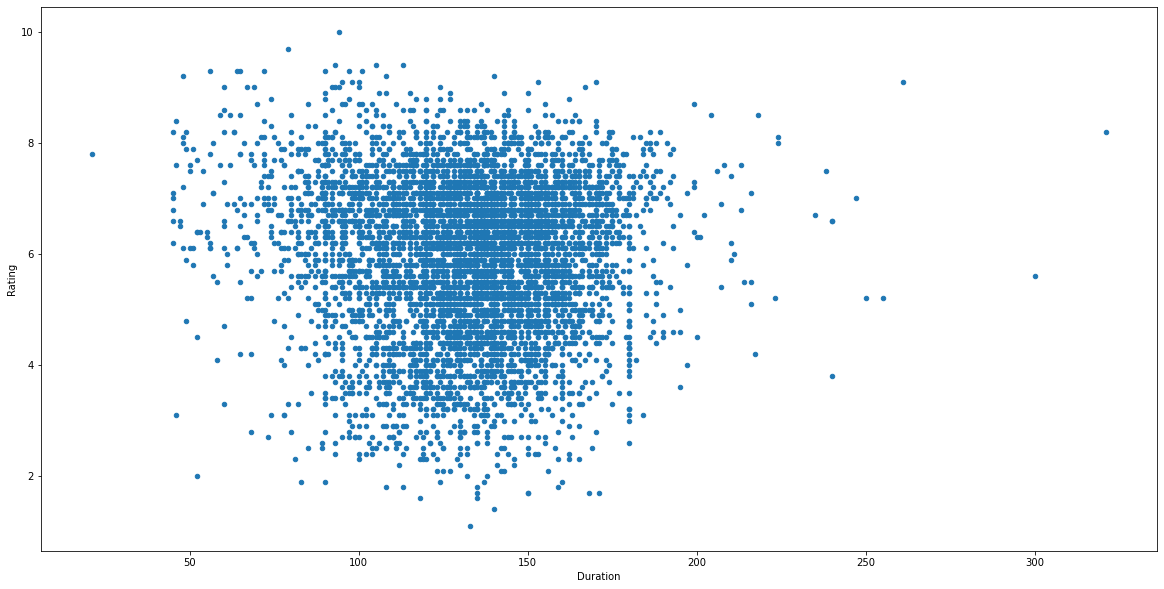

In [46]:
imdb_source[['Duration','Rating']].plot.scatter(x='Duration',y='Rating',figsize=(20,10))